## Загрузка датасета из kaggle.com

### О датасете:

**AQI Data Set** представляет собой комплексное представление об индексе качества воздуха (AQI) наряду с различными параметрами загрязняющих веществ. Состоит из 72 строки и 11 столбцов данных, включая PM10, SO2, NOx, PM2,5, аммиак, O3, CO, бензол и AQI

Примечание:
AQI (индекс качества воздуха) – это показатель чистоты воздуха, основанный на измерении в нем озона, двуокиси азота, диоксида серы, окиси углерода и твердых частиц.
Значение AQI **0-50** указывает на удовлетворительное качество (норму). **50-100** – на умеренный риск для здоровья.
**100-150** – нездоровый и особенно опасен для людей с астмой.
**150-200** – могут возникнуть серьезные последствия даже у здоровых людей.
**300-500** – является самым опасным.

In [ ]:
!gdown --id 1XQWW7lsK0EiaibyDnSfQ1wKoZqdDZ2xu

In [31]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [3]:
! kaggle datasets download -d manavgupta92/airqualityindexdata
! unzip airqualityindexdata.zip -d airqualityindexdata

  0% 0.00/1.64k [00:00<?, ?B/s]
100% 1.64k/1.64k [00:00<00:00, 4.68MB/s]
Archive:  airqualityindexdata.zip
  inflating: airqualityindexdata/AQI Data Set.csv  


In [4]:
! ls

airqualityindexdata  airqualityindexdata.zip  kaggle.json  sample_data


## Импорт библиотек и работа с датасетом

In [5]:
import pandas as pd
import numpy as np

df = pd.read_csv('/content/airqualityindexdata/AQI Data Set.csv')

In [6]:
from matplotlib import pyplot as plt
import seaborn as sns

In [7]:
df.drop('Id', axis=1, inplace=True)

In [8]:
df.head()

,Mounths,PM10 in æg/m3,SO2 in æg/m3,NOx in æg/m3,PM2.5 in æg/m3,Ammonia - NH3 in æg/m3,O3 in æg/m3,CO in mg/m3,Benzene in æg/m3,AQI
0,Jan-17,174.0,26.4,35.0,79,25.0,107.6,0.9,0.7,149.0
1,Feb-17,143.0,35.1,40.3,75,31.0,103.0,0.9,0.9,129.0
2,Mar-17,142.0,32.1,30.9,59,26.0,80.7,0.8,0.5,128.0
3,Apr-17,117.0,50.9,36.3,75,36.0,79.5,0.9,0.7,111.0
4,May-17,NaN,41.6,25.2,53,28.0,70.0,0.5,0.5,NaN


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72 entries, 0 to 71
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Mounths                  72 non-null     object 
 1   PM10 in æg/m3            66 non-null     float64
 2   SO2 in æg/m3             71 non-null     float64
 3   NOx  in æg/m3            70 non-null     float64
 4    PM2.5  in æg/m3         72 non-null     int64  
 5   Ammonia - NH3  in æg/m3  72 non-null     float64
 6   O3   in æg/m3            72 non-null     float64
 7   CO  in mg/m3             72 non-null     float64
 8    Benzene  in æg/m3       72 non-null     float64
 9   AQI                      67 non-null     float64
dtypes: float64(8), int64(1), object(1)
memory usage: 5.8+ KB


In [10]:
# Количество NaN в каждом столбце
len(df) - df.count()

Mounths                    0
PM10 in æg/m3              6
SO2 in æg/m3               1
NOx  in æg/m3              2
 PM2.5  in æg/m3           0
Ammonia - NH3  in æg/m3    0
O3   in æg/m3              0
CO  in mg/m3               0
 Benzene  in æg/m3         0
AQI                        5
dtype: int64

In [11]:
#Удалим NaN
df = df.dropna()

Проверим зависимость (корреляцию) AQI от параметров загрязняющих веществ:

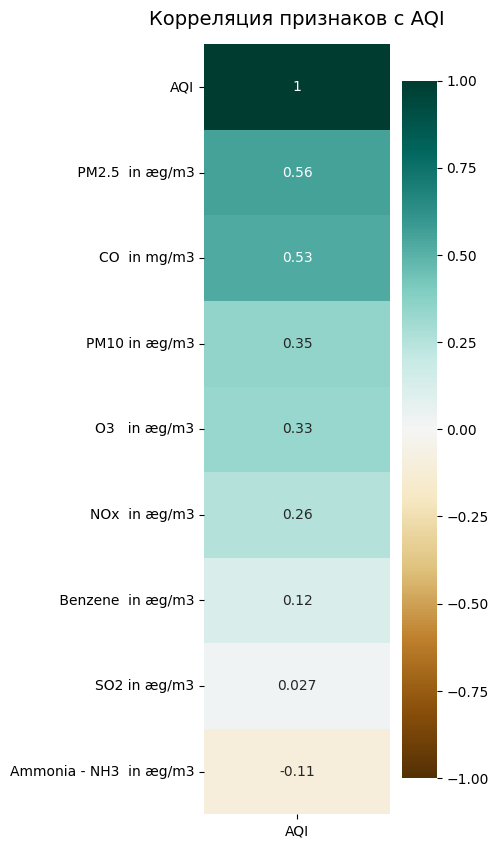

In [12]:
plt.figure(figsize=(3, 10))
heatmap = sns.heatmap(df.corr(numeric_only = True)[['AQI']].sort_values(by='AQI', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')

heatmap.set_title('Корреляция признаков с AQI', fontdict={'fontsize':14}, pad=14);

По тепловой карте видно, что AQI больше всего зависит от **PM2.5** и **CO**

### Список гипотез

1. AQI зависит от сезона, в летний период количество вредных веществ в воздухе меньше.

2. В 2022 году AQI меньше чем в 2017 году

3. Уменьшение СО и РМ2.5 в большей степени влияет на индекс качества воздуха

### Проверка гипотез

Проверка зависимости AQI от сезона

In [13]:
# Разделим колонку с датами в формате "Месяц-год" на два столбца "Месяц" и "Год"
df[['Months', 'Years']] = df['Mounths'].str.split('-', n=1, expand=True)
df['Years'] = df['Years'].apply(lambda x: "20" + x).astype(int)
cols_to_move = ['Months', 'Years']
df = df[cols_to_move + [x for x in df.columns if x not in cols_to_move]].drop('Mounths', axis=1)
df

,Months,Years,PM10 in æg/m3,SO2 in æg/m3,NOx in æg/m3,PM2.5 in æg/m3,Ammonia - NH3 in æg/m3,O3 in æg/m3,CO in mg/m3,Benzene in æg/m3,AQI
0,Jan,2017,174.0,26.4,35.0,79,25.0,107.6,0.90,0.70,149.0
1,Feb,2017,143.0,35.1,40.3,75,31.0,103.0,0.90,0.90,129.0
2,Mar,2017,142.0,32.1,30.9,59,26.0,80.7,0.80,0.50,128.0
3,Apr,2017,117.0,50.9,36.3,75,36.0,79.5,0.90,0.70,111.0
6,Jul,2017,111.0,38.9,21.5,29,30.0,24.4,0.30,0.70,106.7
...,...,...,...,...,...,...,...,...,...,...,...
67,Aug,2022,89.0,12.0,35.0,22,26.0,15.2,0.64,0.09,67.0
68,Sep,2022,92.0,13.0,37.3,30,31.0,10.0,0.70,0.06,76.0
69,Oct,2022,93.0,12.0,30.7,46,28.0,9.7,0.67,0.07,101.0
70,Nov,2022,87.0,10.4,28.2,78,30.0,12.1,1.52,0.03,166.0


In [14]:
# Среднее значение всех параметров с группировкой по месяцам
from numpy.ma.core import mean
df_agg = df.drop('Years', axis=1).groupby(['Months']).agg(mean).round(2)
df_agg

,PM10 in æg/m3,SO2 in æg/m3,NOx in æg/m3,PM2.5 in æg/m3,Ammonia - NH3 in æg/m3,O3 in æg/m3,CO in mg/m3,Benzene in æg/m3,AQI
Months,,,,,,,,,
Apr,115.20,19.90,30.58,51.20,26.00,36.22,0.59,0.25,108.54
Aug,105.50,22.08,27.30,23.67,26.67,14.33,0.39,0.22,84.88
Dec,106.20,10.62,31.54,75.60,17.20,23.90,0.76,0.13,119.38
Feb,124.17,14.98,34.90,58.00,23.17,38.47,0.61,0.31,113.87
Jan,121.00,11.48,30.88,70.00,21.40,38.60,0.61,0.25,124.70
Jul,102.83,18.52,27.95,21.33,26.17,13.75,0.35,0.27,87.72
Jun,106.80,13.78,31.20,25.40,28.38,14.76,0.57,0.19,96.22
Mar,118.33,14.98,31.30,56.00,24.67,30.43,0.62,0.24,119.60
May,105.80,11.84,30.30,37.40,24.78,21.82,0.52,0.15,106.22


([<matplotlib.axis.XTick at 0x7d3f36799750>,
 [Text(0, 0, 'Apr'),
  Text(1, 0, 'Aug'),
  Text(2, 0, 'Dec'),
  Text(3, 0, 'Feb'),
  Text(4, 0, 'Jan'),
  Text(5, 0, 'Jul'),
  Text(6, 0, 'Jun'),
  Text(7, 0, 'Mar'),
  Text(8, 0, 'May'),
  Text(9, 0, 'Nov'),
  Text(10, 0, 'Oct'),
  Text(11, 0, 'Sep')])

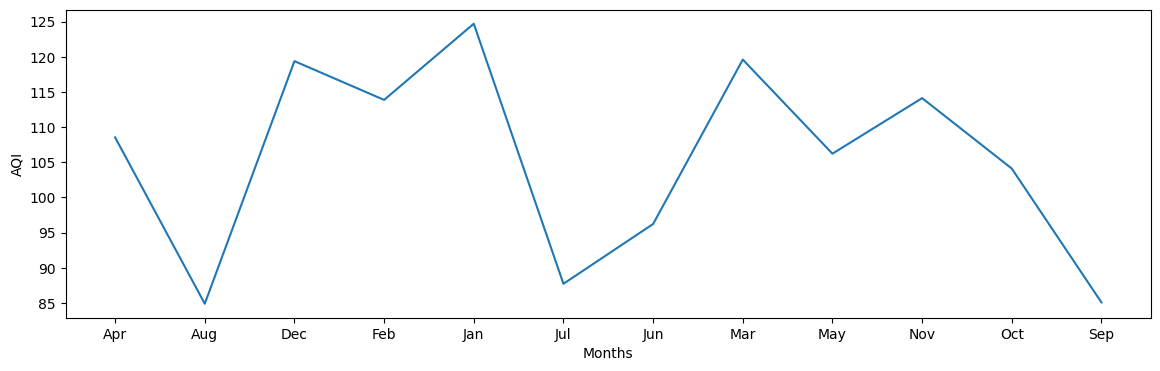

In [15]:
# График зависимости AQI от месяца года
plt.figure(figsize=(14,4))
plt.xlabel('Months')
plt.ylabel('AQI')
df.drop('Years', axis=1).groupby(['Months'])['AQI'].agg(mean).plot()
plt.xticks(np.arange(len(df_agg)), df_agg.index)

**Вывод:** Из построенного графика видно, что наименьшее количество AQI приходится на период **июнь - сентябрь**

### Дополнительные исследования

Проверка зависимости AQI от года

In [16]:
df.drop('Months', axis=1).groupby(['Years']).agg(mean).round(2)

,PM10 in æg/m3,SO2 in æg/m3,NOx in æg/m3,PM2.5 in æg/m3,Ammonia - NH3 in æg/m3,O3 in æg/m3,CO in mg/m3,Benzene in æg/m3,AQI
Years,,,,,,,,,
2017,124.62,35.81,29.66,56.75,26.75,63.21,0.65,0.61,114.75
2018,143.45,16.01,30.66,44.91,20.44,26.04,0.51,0.22,104.54
2019,101.17,11.46,28.13,47.08,22.58,25.68,0.52,0.12,99.14
2020,114.73,12.92,30.67,40.91,25.91,26.05,0.38,0.30,108.70
2021,92.67,13.73,29.59,44.33,22.50,10.18,0.43,0.13,91.58
2022,88.08,12.94,32.72,47.25,27.00,13.67,0.83,0.05,113.75


<Axes: xlabel='Years'>

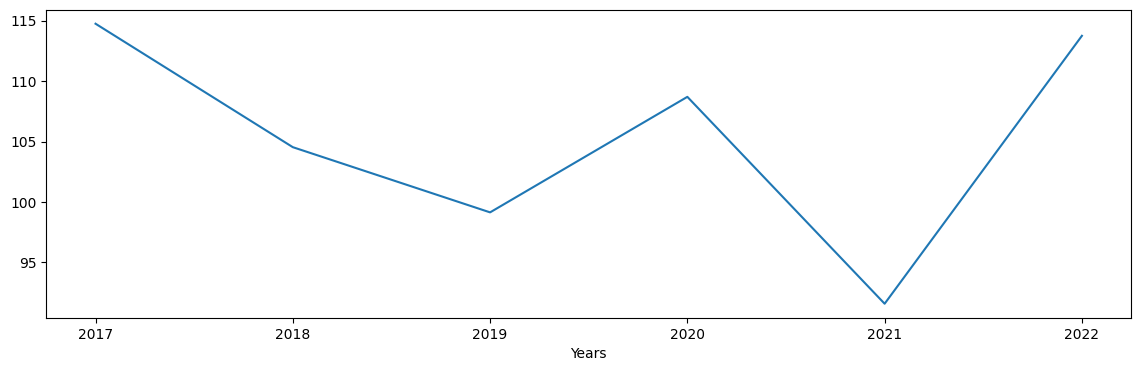

In [17]:
plt.figure(figsize=(14,4))
df.drop('Months', axis=1).groupby(['Years'])['AQI'].agg(mean).plot()

Проверка AQI от СО

In [18]:
df[df['CO  in mg/m3'] == df['CO  in mg/m3'].min()]

,Months,Years,PM10 in æg/m3,SO2 in æg/m3,NOx in æg/m3,PM2.5 in æg/m3,Ammonia - NH3 in æg/m3,O3 in æg/m3,CO in mg/m3,Benzene in æg/m3,AQI
18,Jul,2018,123.0,14.5,31.3,22,33.0,7.9,0.2,0.4,65.6


In [19]:
df[df['CO  in mg/m3'] == df['CO  in mg/m3'].max()]

,Months,Years,PM10 in æg/m3,SO2 in æg/m3,NOx in æg/m3,PM2.5 in æg/m3,Ammonia - NH3 in æg/m3,O3 in æg/m3,CO in mg/m3,Benzene in æg/m3,AQI
70,Nov,2022,87.0,10.4,28.2,78,30.0,12.1,1.52,0.03,166.0


In [20]:
df.describe().round(2)

,Years,PM10 in æg/m3,SO2 in æg/m3,NOx in æg/m3,PM2.5 in æg/m3,Ammonia - NH3 in æg/m3,O3 in æg/m3,CO in mg/m3,Benzene in æg/m3,AQI
count,66.00,66.00,66.00,66.00,66.00,66.00,66.00,66.00,66.00,66.00
mean,2019.67,109.39,16.09,30.26,46.39,24.07,25.35,0.55,0.21,104.81
std,1.67,25.27,9.27,3.95,20.26,5.96,21.43,0.24,0.19,22.05
min,2017.00,76.00,4.00,18.40,12.00,11.00,2.40,0.20,0.00,58.00
25%,2018.00,90.00,9.85,28.12,27.50,20.25,12.02,0.40,0.10,90.95
50%,2020.00,104.00,13.70,29.75,46.50,23.00,18.75,0.50,0.15,103.25
75%,2021.00,128.00,17.15,32.55,62.75,28.00,31.58,0.64,0.30,119.00
max,2022.00,178.00,50.90,40.30,87.00,37.00,107.60,1.52,0.90,166.00


### t-критерий парных выборок

In [21]:
from scipy.stats import ttest_ind

In [22]:
df['test_data'] = df['Months'].apply(lambda x: "A" if (x=="Jun" or x=="Jul" or x=="Aug") else ("B" if (x=="Dec" or x=="Jan" or x=="Feb") else ""))

In [26]:
df_test = df.loc[(df['test_data'] != "")]
df_test.head()

,Months,Years,PM10 in æg/m3,SO2 in æg/m3,NOx in æg/m3,PM2.5 in æg/m3,Ammonia - NH3 in æg/m3,O3 in æg/m3,CO in mg/m3,Benzene in æg/m3,AQI,test_data
0,Jan,2017,174.0,26.4,35.0,79,25.0,107.6,0.9,0.7,149.0,B
1,Feb,2017,143.0,35.1,40.3,75,31.0,103.0,0.9,0.9,129.0,B
6,Jul,2017,111.0,38.9,21.5,29,30.0,24.4,0.3,0.7,106.7,A
7,Aug,2017,78.0,36.0,18.4,35,23.0,22.5,0.4,0.5,78.3,A
13,Feb,2018,178.0,17.0,37.0,53,23.0,54.1,0.7,0.3,118.0,B


In [24]:
group1 = df.loc[(df['test_data'] == "A")]
group2 = df.loc[(df['test_data'] == "B")]

In [25]:
ttest_ind(group1['AQI'], group2['AQI'], equal_var=False)

TtestResult(statistic=-4.30733906716117, pvalue=0.00016313885227928456, df=29.993877292930172)

**Вывод:** Поскольку p-значение меньше 0,05, мы отклоняем нулевую гипотезу t-критерия  и делаем вывод, что имеется достаточно доказательств того, что сезонность (лето, зима) влияет на индекс качества воздуха.